# MNIST 손글씨 - Neural Network

In [1]:
import numpy as np
import tensorflow as tf

In [2]:
# 실행할 때마다 같은 결과를 출력하기 위한 seed 값 설정
seed =2021
np.random.seed(seed)
tf.random.set_seed(seed)

### 데이터 전처리

In [3]:
from tensorflow.keras.datasets import mnist
(X_train, Y_class_train), (X_test, Y_class_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

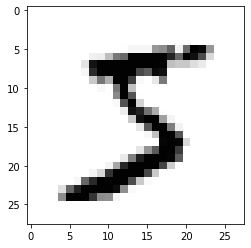

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(X_train[0], cmap='Greys')
plt.show()

In [6]:
import sys
for x in X_train[0]:
    for i in x:
        sys.stdout.write(f'{i:3d} ')
    sys.stdout.write('\n')

  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0 
  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0 
  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0 
  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   0   0   0   0   0 

In [7]:
# 0~1 사이의 값으로 정규화

X_train = X_train.reshape(-1, 784)
X_train = X_train / 255.0
X_train.shape

(60000, 784)

In [8]:
X_test = X_test.reshape(-1, 784)
X_test = X_test / 255.0
type(X_test[0,0])

numpy.float64

In [9]:
Y_class_train[0]

5

In [10]:
# One hot encoding
from tensorflow.keras.utils import to_categorical
Y_train = to_categorical(Y_class_train, 10)
Y_test = to_categorical(Y_class_test, 10)
Y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

### 모델 정의, 설정, 학습

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import os
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

In [12]:
model = Sequential([
    Dense(512, input_dim=784, activation='relu'),
    Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [13]:
# 모델 실행환경 설정
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
# 모델 저장 조건 설정
modelpath = MODEL_DIR + "best{epoch:03d}-{val_loss:.4f}.hdf5"

In [15]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', 
                               verbose=1, save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

In [16]:
# 모델 실행
history = model.fit(X_train, Y_train, validation_split=0.2,
                    epochs=30, batch_size=200, verbose=0,
                    callbacks=[checkpointer, early_stopping])


Epoch 00001: val_loss improved from inf to 0.17141, saving model to ./model/best001-0.1714.hdf5

Epoch 00002: val_loss improved from 0.17141 to 0.12338, saving model to ./model/best002-0.1234.hdf5

Epoch 00003: val_loss improved from 0.12338 to 0.10215, saving model to ./model/best003-0.1021.hdf5

Epoch 00004: val_loss improved from 0.10215 to 0.08730, saving model to ./model/best004-0.0873.hdf5

Epoch 00005: val_loss improved from 0.08730 to 0.08389, saving model to ./model/best005-0.0839.hdf5

Epoch 00006: val_loss did not improve from 0.08389

Epoch 00007: val_loss improved from 0.08389 to 0.07417, saving model to ./model/best007-0.0742.hdf5

Epoch 00008: val_loss did not improve from 0.07417

Epoch 00009: val_loss improved from 0.07417 to 0.07180, saving model to ./model/best009-0.0718.hdf5

Epoch 00010: val_loss did not improve from 0.07180

Epoch 00011: val_loss did not improve from 0.07180

Epoch 00012: val_loss did not improve from 0.07180

Epoch 00013: val_loss did not improv

In [17]:
from tensorflow.keras.models import load_model
best_model = load_model('./model/best009-0.0718.hdf5')

In [18]:
# 테스트 정확도 출력
acc = model.evaluate(X_test, Y_test, verbose=2)[1]
print(f'\n Test Accuracy: {acc:.4f}')

313/313 - 1s - loss: 0.0646 - accuracy: 0.9819

 Test Accuracy: 0.9819


### 훈련 과정 시각화

In [19]:
# 검증셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

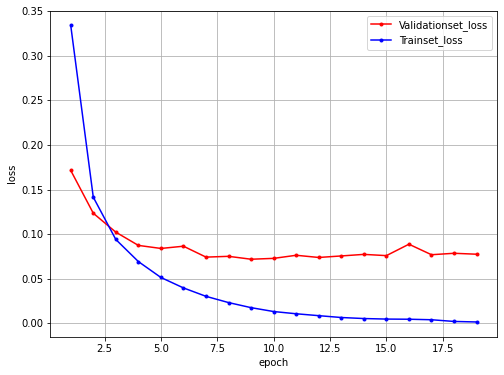

In [20]:
# 그래프로 표현
x_len = np.arange(1, len(y_loss)+1)
plt.figure(figsize=(8,6))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Validationset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
#plt.axis([0, 20, 0, 0.35])
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()